In [2]:
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open('C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/datasets/categories/allFiles/appliances.json', 'r') as f:
    data = json.load(f)
# data[0]['reviews']

In [4]:
topics = []
for index in range(len(data)):
    for i in range(len(data[index]['reviews'])):
        for j in range(len(data[index]["reviews"][i]['review_topics'])):
            topics.append(data[index]["reviews"][i]['review_topics'][j])
# topics

In [5]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().lower())  # Convert to lowercase for consistency
    return synonyms

# syn = list(get_synonyms(topics[9]))
# syn

In [64]:
def are_phrases_similar(phrase1, phrase2):
    # Tokenize and normalize phrases
    tokens1 = set(word_tokenize(phrase1.lower()))
    tokens2 = set(word_tokenize(phrase2.lower()))
    
    # Check if both phrases have similar tokens
    if tokens1 == tokens2:
        return True
    
    # Check for synonyms
    for token in tokens1:
        synonyms = get_synonyms(token)
        if tokens2.intersection(synonyms):
            return True
    
    return False

In [66]:
def count_phrase_frequency_in_array(phrase_array):
    frequency_counter = Counter()
    
    # Iterate through each phrase in the array
    for i, phrase1 in enumerate(phrase_array):
        # Initialize count for the current phrase
        count = 1
        
        # Compare the current phrase with all other phrases in the array
        for j, phrase2 in enumerate(phrase_array):
            if i != j:  # Avoid comparing a phrase with itself
                # Check if the phrases are similar or have similar meanings
                if are_phrases_similar(phrase1, phrase2):
                    count += 1
        
        # Update frequency counter for the current phrase
        # for k, phrase2 in enumerate(phrase_array):
        #     if i!= k:  # Avoid comparing a phrase with itself
        #         if not are_phrases_similar(phrase1, phrase2):
        #             # print(phrase1)
        #             # print(phrase2)
        #             # print('============')
        #             frequency_counter[phrase1] = count
        frequency_counter[phrase1] = count
        # print(dict(frequency_counter))
    return frequency_counter



In [67]:
# topics = []
for index in range(len(data)):
    data[index]['topic_frequency'] = []
    if index < 1:
        # for i in range(len(data[index]['reviews'])):
        frequency = count_phrase_frequency_in_array(topics)
        freq = dict(frequency)
        temp = []
        for key, value in freq.items():
            temp.append({'topic': key, 'freq': value})
        sorted_freq = sorted(temp, key=lambda x: x['freq'], reverse=True)
        # print(sorted_freq)
        x = []
        y = []
        for k in sorted_freq[0: 10]:
            x.append(k['topic'])
            y.append(k['freq'])
            print(k['freq'])

11
9
8
8
7
7
7
7
6
6


10


C:\Users\GS\AppData\Local\Temp\ipykernel_8792\128388400.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%', '25%'])


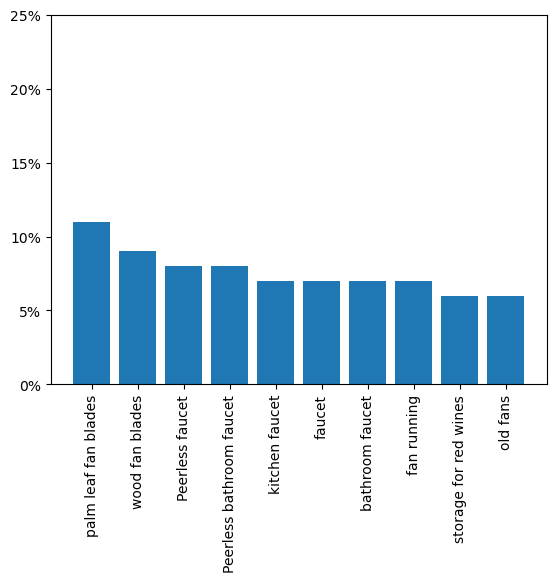

In [68]:
print(len(y))
fig, ax = plt.subplots()
bars = ax.bar(x, y)
scaled_y = [val / max(y) * 100 for val in y]
# plt.bar(x, scaled_y)
ax.set_ylim(0, 25)
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%', '25%'])
plt.xticks(rotation='vertical')
# plt.yticks(y, ['{}%'.format(i) for i in y])
plt.show()